In [ ]:
# 0. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/dataset/new2_stroke_prediction_dataset.csv'
data = pd.read_csv(file_path)

print("Full dataset shape:", data.shape)
print(data.columns.tolist())

Full dataset shape: (15000, 30)
['Hypertension', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels', 'Symptoms', 'Age_scaled', 'Age_group', 'Gender_encoded', 'Residence_encoded', 'Smoking Status_Formerly Smoked', 'Smoking Status_Non-smoker', 'Alcohol Intake_Never', 'Alcohol Intake_Rarely', 'Alcohol Intake_Social Drinker', 'Systolic Pressure', 'Diastolic Pressure', 'HDL Cholesterol', 'LDL Cholesterol', 'Physical Activity_Low', 'Physical Activity_Moderate', 'Family History of Stroke_encoded', 'Dietary Habits_Keto', 'Dietary Habits_Non-Vegetarian', 'Dietary Habits_Paleo', 'Dietary Habits_Pescatarian', 'Dietary Habits_Vegan', 'Dietary Habits_Vegetarian', 'Diagnosis_encoded']


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
import catboost
print(catboost.__version__)


1.2.8


In [ ]:
!pip install tabpfn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 kB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 107.9 MB/s eta 0:00:00


In [ ]:
# =========================
# Advanced Stroke Prediction Pipeline
# =========================

# Step 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
# from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier
from sklearn.impute import KNNImputer

# Step 2: Load Dataset
file_path = '/content/drive/My Drive/dataset/new2_stroke_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Step 3: Initial Cleanup
cols_to_drop = ['Patient ID', 'Patient Name']
for col in cols_to_drop:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)
# Fill missing Symptoms
data["Symptoms"] = data["Symptoms"].fillna("No Symptoms")

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import VotingClassifier
from category_encoders import TargetEncoder
from tabpfn import TabPFNClassifier # Import TabPFNClassifier

# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()


# Fill missing values
num_imputer = KNNImputer(n_neighbors=5)
data[num_cols] = num_imputer.fit_transform(data[num_cols])
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# ===============================
# Step 4: Feature Engineering
# ===============================
# 1. Age categories
if 'Age' in data.columns:
    data['Age_group'] = pd.cut(data['Age'], bins=[0,30,50,70,100], labels=[1,2,3,4]).astype(int)
    if 'Age_group' not in cat_cols:
        cat_cols.append('Age_group')

# 2. Interaction: Hypertension x Age
if 'Hypertension' in data.columns and 'Age' in data.columns:
    data['Hypertension_x_Age'] = data['Hypertension'] * data['Age']

# 3. BMI categories
if 'BMI' in data.columns:
    data['BMI_category'] = pd.cut(data['BMI'], bins=[0,18.5,24.9,29.9,100], labels=[1,2,3,4]).astype(int)
    if 'BMI_category' not in cat_cols:
        cat_cols.append('BMI_category')

# 4. Glucose x Age interaction
if 'Average Glucose Level' in data.columns and 'Age' in data.columns:
    data['Glucose_x_Age'] = data['Average Glucose Level'] * data['Age']

if 'Hypertension' in data.columns and 'Heart Disease' in data.columns:
    data['Cardio_Risk'] = data['Hypertension'].astype(int) | data['Heart Disease'].astype(int)
    if 'Cardio_Risk' not in cat_cols:
        cat_cols.append('Cardio_Risk')

# 6. Lifestyle risk score
lifestyle_cols = []
for col in ['Smoking Status', 'Alcohol Intake', 'Physical Activity']:
    if col in data.columns:
        lifestyle_cols.append(col)
if lifestyle_cols:
    pass


# 7. Stress x Age interaction
if 'Stress Levels' in data.columns and 'Age' in data.columns:
    data['Stress_x_Age'] = data['Stress Levels'] * data['Age']

# Step 5: Encode Categorical Features
target_col = 'Diagnosis_encoded' # Corrected target column name
te = TargetEncoder()
# Re-identify categorical columns after feature engineering as new ones were added
cat_cols_after_fe = data.select_dtypes(include=['object']).columns.tolist()

# Only apply Target Encoding to the actual object type columns
for col in cat_cols_after_fe:
    data[col] = te.fit_transform(data[col], data[target_col])

# Step 6: Separate Features and Target
X = data.drop(target_col, axis=1)
y = data[target_col]

# Verify data types before SMOTENC
print("Data types before SMOTENC:")
print(X.dtypes)


# Step 7: Handle Class Imbalance with SMOTENC
categorical_indices = [X.columns.get_loc(col) for col in cat_cols if col in X.columns]
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

print("Original shape:", X.shape, y.value_counts())
print("Resampled shape:", X_resampled.shape, np.bincount(y_resampled))

# Step 8: Scale Features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Step 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ===============================
# Step 10: Train CatBoost
# ===============================
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_state=42,
    verbose=100,
    early_stopping_rounds=50
)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_cat_pred = cat_model.predict(X_test)
y_cat_proba = cat_model.predict_proba(X_test)[:,1]

print("\n=== CatBoost Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_cat_pred))
print("Precision:", precision_score(y_test, y_cat_pred))
print("Recall:", recall_score(y_test, y_cat_pred))
print("F1 Score:", f1_score(y_test, y_cat_pred))
print("ROC AUC:", roc_auc_score(y_test, y_cat_proba))

Data types before SMOTENC:
Hypertension                        float64
Heart Disease                       float64
Average Glucose Level               float64
Body Mass Index (BMI)               float64
Stroke History                      float64
Stress Levels                       float64
Symptoms                            float64
Age_scaled                          float64
Age_group                           float64
Gender_encoded                      float64
Residence_encoded                   float64
Smoking Status_Formerly Smoked      float64
Smoking Status_Non-smoker           float64
Alcohol Intake_Never                float64
Alcohol Intake_Rarely               float64
Alcohol Intake_Social Drinker       float64
Systolic Pressure                   float64
Diastolic Pressure                  float64
HDL Cholesterol                     float64
LDL Cholesterol                     float64
Physical Activity_Low               float64
Physical Activity_Moderate          float64
Famil

In [ ]:
# Step 11 (continued): Feature Importance for CatBoost
print("\n=== CatBoost Feature Importance ===")
feature_importance = cat_model.get_feature_importance(prettified=True)

# Get feature names from the original data before scaling
feature_names = X.columns.tolist()

# Ensure 'Feature Id' is integer type before using it as an index
feature_importance['Feature Id'] = feature_importance['Feature Id'].astype(int)

# Map Feature Id to Feature Name
# The Feature Id in CatBoost importance usually corresponds to the column index
feature_importance['Feature Name'] = feature_importance['Feature Id'].apply(lambda x: feature_names[x])

# Reorder columns to show Feature Name first
feature_importance = feature_importance[['Feature Name', 'Importances']]

display(feature_importance)


=== CatBoost Feature Importance ===


,Feature Name,Importances
0,Symptoms,84.237489
1,Average Glucose Level,1.209975
2,Body Mass Index (BMI),0.884693
3,Stress Levels,0.843943
4,Diastolic Pressure,0.829990
5,Smoking Status_Formerly Smoked,0.804817
6,Residence_encoded,0.736093
7,Age_scaled,0.723083
8,LDL Cholesterol,0.711402
9,HDL Cholesterol,0.709498


Now that we've seen the feature importance for the CatBoost model, let's evaluate the other models and the hybrid ensemble, and then compare their performance.

In [ ]:
# Step 10 (continued): Train Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1) # Increased estimators, added n_jobs
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
y_rf_proba = rf_model.predict_proba(X_test)[:,1]

print("\n=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1 Score:", f1_score(y_test, y_rf_pred))
print("ROC AUC:", roc_auc_score(y_test, y_rf_proba))


=== Random Forest Evaluation ===
Accuracy: 0.7261865250580817
Precision: 0.7501836884643645
Recall: 0.6779548472775564
F1 Score: 0.7122427624694803
ROC AUC: 0.8375947658161866


In [ ]:
print("\n=== Random Forest Feature Importance ===")

# Get feature importances from the Random Forest model
rf_feature_importance = pd.DataFrame({
    'Feature Name': X.columns.tolist(),
    'Importances': rf_model.feature_importances_
})

# Sort by importance
rf_feature_importance = rf_feature_importance.sort_values(by='Importances', ascending=False).reset_index(drop=True)

display(rf_feature_importance)


=== Random Forest Feature Importance ===


,Feature Name,Importances
0,Symptoms,0.357896
1,Average Glucose Level,0.063493
2,Stress Levels,0.062291
3,Body Mass Index (BMI),0.062176
4,LDL Cholesterol,0.057345
5,Systolic Pressure,0.055663
6,Diastolic Pressure,0.052470
7,HDL Cholesterol,0.051910
8,Age_scaled,0.051282
9,Age_group,0.023274


In [ ]:
# Get feature importances from the CatBoost and Random Forest models
cat_importances = cat_model.get_feature_importance()
rf_importances = rf_model.feature_importances_

# Ensure the importances are numpy arrays
cat_importances = np.array(cat_importances)
rf_importances = np.array(rf_importances)

In [ ]:
# Reshape importances to match the data shape for element-wise multiplication
cat_importances_reshaped = cat_importances.reshape(1, -1)
rf_importances_reshaped = rf_importances.reshape(1, -1)

# Combine features by weighting with importances
X_train_combined = X_train * cat_importances_reshaped + X_train * rf_importances_reshaped
X_test_combined = X_test * cat_importances_reshaped + X_test * rf_importances_reshaped

In [ ]:
X_train_combined = np.hstack([
    X_train,
    X_train * cat_importances.reshape(1, -1),
    X_train * rf_importances.reshape(1, -1)
])
X_test_combined = np.hstack([
    X_test,
    X_test * cat_importances.reshape(1, -1),
    X_test * rf_importances.reshape(1, -1)
])


In [ ]:
from sklearn.metrics import precision_recall_curve

# ===============================
# Step 1: Train Multiple TabPFN Models
# ===============================
tabpfn_models = []
seeds = [42, 123, 2025]  # You can add more seeds for stronger ensembles

for seed in seeds:
    model = TabPFNClassifier(random_state=seed, device='cpu', ignore_pretraining_limits=True)
    model.fit(X_train_combined, y_train)
    tabpfn_models.append(model)

# ===============================
# Step 2: Predict and Average Probabilities
# ===============================
probas = []
for model in tabpfn_models:
    probas.append(model.predict_proba(X_test_combined)[:, 1])

# Average ensemble probabilities
y_ensemble_proba = np.mean(probas, axis=0)

# ===============================
# Step 3: Optimize Threshold on Ensemble
# ===============================
precision, recall, thresholds = precision_recall_curve(y_test, y_ensemble_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Final predictions
y_ensemble_pred = (y_ensemble_proba >= optimal_threshold).astype(int)

# ===============================
# Step 4: Evaluation
# ===============================
print("\n=== TabPFN Ensemble Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_ensemble_pred))
print("Precision:", precision_score(y_test, y_ensemble_pred))
print("Recall:", recall_score(y_test, y_ensemble_pred))
print("F1 Score:", f1_score(y_test, y_ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, y_ensemble_proba))
print("Optimal Threshold:", optimal_threshold)

tabpfn-v2-classifier-finetuned-zk73skhh.(…):   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]


=== TabPFN Ensemble Evaluation ===
Accuracy: 0.7062728177895785
Precision: 0.6379386939138161
Recall: 0.953519256308101
F1 Score: 0.7644397125365984
ROC AUC: 0.8308530972328337
Optimal Threshold: 0.4079937


In [ ]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

tabpfn_model = TabPFNClassifier(random_state=42, device='cpu', ignore_pretraining_limits=True)  # use 'cpu' if no GPU
tabpfn_model.fit(X_train_combined, y_train)

y_tabpfn_pred = tabpfn_model.predict(X_test_combined)
y_tabpfn_proba = tabpfn_model.predict_proba(X_test_combined)[:,1]

print("\n=== TabPFN Evaluation on Combined Features ===")
print("Accuracy:", accuracy_score(y_test, y_tabpfn_pred))
print("Precision:", precision_score(y_test, y_tabpfn_pred))
print("Recall:", recall_score(y_test, y_tabpfn_pred))
print("F1 Score:", f1_score(y_test, y_tabpfn_pred))
print("ROC AUC:", roc_auc_score(y_test, y_tabpfn_proba))


=== TabPFN Evaluation on Combined Features ===
Accuracy: 0.7135745104546963
Precision: 0.7252978276103714
Recall: 0.6872509960159362
F1 Score: 0.7057620184111831
ROC AUC: 0.8314615900476837


In [ ]:
import numpy as np

# Get feature importances or transformed features (numeric arrays)
cat_features_array = cat_model.predict_proba(X_train)  # or use transformed features
rf_features_array = rf_model.predict_proba(X_train)

# Concatenate horizontally for TabPFN input
X_train_combined = np.hstack((cat_features_array, rf_features_array))
X_test_combined = np.hstack((
    cat_model.predict_proba(X_test),
    rf_model.predict_proba(X_test)
))


In [ ]:
tabpfn_model = TabPFNClassifier(
    device='cuda',
    random_state=42,
    ignore_pretraining_limits=True
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_tabpfn_pred))
print("Precision:", precision_score(y_test, y_tabpfn_pred))
print("Recall:", recall_score(y_test, y_tabpfn_pred))
print("F1 Score:", f1_score(y_test, y_tabpfn_pred))
print("ROC AUC:", roc_auc_score(y_test, y_tabpfn_proba))


Accuracy: 0.7135745104546963
Precision: 0.7252978276103714
Recall: 0.6872509960159362
F1 Score: 0.7057620184111831
ROC AUC: 0.8314615900476837


In [ ]:
#stop

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_tabpfn_proba)
# Choose threshold for better recall without losing too much precision
optimal_idx = np.argmax(recall - (1-precision))
optimal_threshold = thresholds[optimal_idx]

y_tabpfn_pred_thresholded = (y_tabpfn_proba >= optimal_threshold).astype(int)


In [ ]:
# ===============================
# Step 12: TabPFN Model (on original features)
# ===============================
# Note: This is TabPFN on the original scaled features, not the combined features used earlier.
# We are evaluating it here for comparison with other base models.
tabpfn_model_original = TabPFNClassifier(random_state=42, device='cpu', ignore_pretraining_limits=True) # use 'cpu' if no GPU
tabpfn_model_original.fit(X_train, y_train)

y_tab_pred_original = tabpfn_model_original.predict(X_test)
y_tab_proba_original = tabpfn_model_original.predict_proba(X_test)[:,1]

print("\n=== TabPFN Evaluation (Original Features) ===")
print("Accuracy:", accuracy_score(y_test, y_tab_pred_original))
print("Precision:", precision_score(y_test, y_tab_pred_original))
print("Recall:", recall_score(y_test, y_tab_pred_original))
print("F1 Score:", f1_score(y_test, y_tab_pred_original))
print("ROC AUC:", roc_auc_score(y_test, y_tab_proba_original))


=== TabPFN Evaluation (Original Features) ===
Accuracy: 0.709259873879854
Precision: 0.7137042062415196
Recall: 0.6985391766268261
F1 Score: 0.7060402684563758
ROC AUC: 0.8310513751232629


In [ ]:
# ===============================
# Step 11: Stacking Ensemble
# ===============================
# Define base models for stacking
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define the stacking model
stack_model = StackingClassifier(
    estimators=[('cat', cat_model), ('rf', rf), ('gb', gb)],
    final_estimator=CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0, random_state=42)
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions and get probabilities
y_stack_pred = stack_model.predict(X_test)
y_stack_proba = stack_model.predict_proba(X_test)[:,1]

print("\n=== Stacking Ensemble Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_stack_pred))
print("Precision:", precision_score(y_test, y_stack_pred))
print("Recall:", recall_score(y_test, y_stack_pred))
print("F1 Score:", f1_score(y_test, y_stack_pred))
print("ROC AUC:", roc_auc_score(y_test, y_stack_proba))


# ===============================
# Step 13: Hybrid Ensemble (CatBoost + Stacking + TabPFN)
# ===============================
from sklearn.ensemble import VotingClassifier

hybrid_model = VotingClassifier(
    estimators=[
        ('catboost', cat_model),
        ('stack', stack_model),
        ('tabpfn', tabpfn_model_original) # Use TabPFN trained on original features for the ensemble
    ],
    voting='soft'  # combine probabilities
)
hybrid_model.fit(X_train, y_train)

y_hybrid_pred = hybrid_model.predict(X_test)
y_hybrid_proba = hybrid_model.predict_proba(X_test)[:,1]

print("\n=== Hybrid Ensemble Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_hybrid_pred))
print("Precision:", precision_score(y_test, y_hybrid_pred))
print("Recall:", recall_score(y_test, y_hybrid_pred))
print("F1 Score:", f1_score(y_test, y_hybrid_pred))
print("ROC AUC:", roc_auc_score(y_test, y_hybrid_proba))

0:	total: 9.65ms	remaining: 9.64s
100:	total: 609ms	remaining: 5.42s
200:	total: 1.22s	remaining: 4.83s
300:	total: 1.8s	remaining: 4.19s
400:	total: 2.4s	remaining: 3.58s
500:	total: 3.02s	remaining: 3.01s
600:	total: 3.62s	remaining: 2.4s
700:	total: 4.22s	remaining: 1.8s
800:	total: 4.82s	remaining: 1.2s
900:	total: 5.42s	remaining: 596ms
999:	total: 6.02s	remaining: 0us
0:	total: 5.09ms	remaining: 5.08s
100:	total: 457ms	remaining: 4.07s
200:	total: 909ms	remaining: 3.61s
300:	total: 1.36s	remaining: 3.17s
400:	total: 1.82s	remaining: 2.71s
500:	total: 2.27s	remaining: 2.26s
600:	total: 2.73s	remaining: 1.81s
700:	total: 3.18s	remaining: 1.36s
800:	total: 3.64s	remaining: 903ms
900:	total: 4.09s	remaining: 450ms
999:	total: 4.54s	remaining: 0us
0:	total: 4.68ms	remaining: 4.68s
100:	total: 454ms	remaining: 4.04s
200:	total: 908ms	remaining: 3.61s
300:	total: 1.36s	remaining: 3.15s
400:	total: 1.81s	remaining: 2.7s
500:	total: 2.26s	remaining: 2.25s
600:	total: 2.71s	remaining: 1.8s

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 10 (continued): Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=1000, random_state=42) # Increased estimators
gb_model.fit(X_train, y_train)

y_gb_pred = gb_model.predict(X_test)
y_gb_proba = gb_model.predict_proba(X_test)[:,1]

print("\n=== Gradient Boosting Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_gb_pred))
print("Precision:", precision_score(y_test, y_gb_pred))
print("Recall:", recall_score(y_test, y_gb_pred))
print("F1 Score:", f1_score(y_test, y_gb_pred))
print("ROC AUC:", roc_auc_score(y_test, y_gb_proba))


# Create a dictionary to store the metrics for each model
metrics = {
    'Model': ['CatBoost', 'Random Forest', 'Gradient Boosting', 'Stacking Ensemble', 'TabPFN (Original Features)', 'Hybrid Ensemble'],
    'Accuracy': [accuracy_score(y_test, y_cat_pred), accuracy_score(y_test, y_rf_pred), accuracy_score(y_test, y_gb_pred), accuracy_score(y_test, y_stack_pred), accuracy_score(y_test, y_tab_pred_original), accuracy_score(y_test, y_hybrid_pred)],
    'Precision': [precision_score(y_test, y_cat_pred), precision_score(y_test, y_rf_pred), precision_score(y_test, y_gb_pred), precision_score(y_test, y_stack_pred), precision_score(y_test, y_tab_pred_original), precision_score(y_test, y_hybrid_pred)],
    'Recall': [recall_score(y_test, y_cat_pred), recall_score(y_test, y_rf_pred), recall_score(y_test, y_gb_pred), recall_score(y_test, y_stack_pred), recall_score(y_test, y_tab_pred_original), recall_score(y_test, y_hybrid_pred)],
    'F1 Score': [f1_score(y_test, y_cat_pred), f1_score(y_test, y_rf_pred), f1_score(y_test, y_gb_pred), f1_score(y_test, y_stack_pred), f1_score(y_test, y_tab_pred_original), f1_score(y_test, y_hybrid_pred)],
    'ROC AUC': [roc_auc_score(y_test, y_cat_proba), roc_auc_score(y_test, y_rf_proba), roc_auc_score(y_test, y_gb_proba), roc_auc_score(y_test, y_stack_proba), roc_auc_score(y_test, y_tab_proba_original), roc_auc_score(y_test, y_hybrid_proba)]
}

# Create a pandas DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
display(metrics_df)


=== Gradient Boosting Evaluation ===
Accuracy: 0.7039495519415865
Precision: 0.7043941411451398
Recall: 0.702523240371846
F1 Score: 0.7034574468085106
ROC AUC: 0.8185959986640476


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,CatBoost,0.727182,0.738494,0.703187,0.720408,0.837783
1,Random Forest,0.726187,0.750184,0.677955,0.712243,0.837595
2,Gradient Boosting,0.703950,0.704394,0.702523,0.703457,0.818596
3,Stacking Ensemble,0.710919,0.726301,0.676627,0.700584,0.825947
4,TabPFN (Original Features),0.709260,0.713704,0.698539,0.706040,0.831051
5,Hybrid Ensemble,0.713243,0.722299,0.692563,0.707119,0.833791


In [ ]:
# Step 10 (continued): Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=1000, random_state=42) # Increased estimators
gb_model.fit(X_train, y_train)

y_gb_pred = gb_model.predict(X_test)
y_gb_proba = gb_model.predict_proba(X_test)[:,1]

print("\n=== Gradient Boosting Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_gb_pred))
print("Precision:", precision_score(y_test, y_gb_pred))
print("Recall:", recall_score(y_test, y_gb_pred))
print("F1 Score:", f1_score(y_test, y_gb_pred))
print("ROC AUC:", roc_auc_score(y_test, y_gb_proba))


=== Gradient Boosting Evaluation ===
Accuracy: 0.7039495519415865
Precision: 0.7043941411451398
Recall: 0.702523240371846
F1 Score: 0.7034574468085106
ROC AUC: 0.8185959986640476


In [ ]:

# ===============================
# Step 11: Stacking Ensemble remove
# ===============================
rf = RandomForestClassifier(n_estimators=500, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

stack_model = StackingClassifier(
    estimators=[('cat', cat_model), ('rf', rf), ('gb', gb)],
    final_estimator=CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0, random_state=42)
)
stack_model.fit(X_train, y_train)

y_stack_pred = stack_model.predict(X_test)
y_stack_proba = stack_model.predict_proba(X_test)[:,1]

print("\n=== Stacking Ensemble Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_stack_pred))
print("Precision:", precision_score(y_test, y_stack_pred))
print("Recall:", recall_score(y_test, y_stack_pred))
print("F1 Score:", f1_score(y_test, y_stack_pred))
print("ROC AUC:", roc_auc_score(y_test, y_stack_proba))

# ===============================
# Step 12: TabPFN Model
# ===============================
tabpfn_model = TabPFNClassifier(ignore_pretraining_limits=True)
tabpfn_model.fit(X_train, y_train)

y_tab_pred = tabpfn_model.predict(X_test)
y_tab_proba = tabpfn_model.predict_proba(X_test)[:,1]

print("\n=== TabPFN Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_tab_pred))
print("Precision:", precision_score(y_test, y_tab_pred))
print("Recall:", recall_score(y_test, y_tab_pred))
print("F1 Score:", f1_score(y_test, y_tab_pred))
print("ROC AUC:", roc_auc_score(y_test, y_tab_proba))

# ===============================
# Step 13: Hybrid Ensemble (CatBoost + Stacking + TabPFN)
# ===============================
hybrid_model = VotingClassifier(
    estimators=[
        ('catboost', cat_model),
        ('stack', stack_model),
        ('tabpfn', tabpfn_model)
    ],
    voting='soft'  # combine probabilities
)
hybrid_model.fit(X_train, y_train)

y_hybrid_pred = hybrid_model.predict(X_test)
y_hybrid_proba = hybrid_model.predict_proba(X_test)[:,1]

print("\n=== Hybrid Ensemble Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_hybrid_pred))
print("Precision:", precision_score(y_test, y_hybrid_pred))
print("Recall:", recall_score(y_test, y_hybrid_pred))
print("F1 Score:", f1_score(y_test, y_hybrid_pred))
print("ROC AUC:", roc_auc_score(y_test, y_hybrid_proba))

0:	total: 7.85ms	remaining: 7.84s
100:	total: 608ms	remaining: 5.41s
200:	total: 1.21s	remaining: 4.81s
300:	total: 1.79s	remaining: 4.16s
400:	total: 2.38s	remaining: 3.56s
500:	total: 2.97s	remaining: 2.96s
600:	total: 3.56s	remaining: 2.36s
700:	total: 4.15s	remaining: 1.77s
800:	total: 4.74s	remaining: 1.18s
900:	total: 5.34s	remaining: 587ms
999:	total: 5.93s	remaining: 0us
0:	total: 5.25ms	remaining: 5.25s
100:	total: 452ms	remaining: 4.02s
200:	total: 902ms	remaining: 3.59s
300:	total: 1.36s	remaining: 3.15s
400:	total: 1.81s	remaining: 2.71s
500:	total: 2.27s	remaining: 2.26s
600:	total: 2.72s	remaining: 1.81s
700:	total: 3.18s	remaining: 1.36s
800:	total: 3.63s	remaining: 903ms
900:	total: 4.1s	remaining: 450ms
999:	total: 4.55s	remaining: 0us
0:	total: 4.8ms	remaining: 4.8s
100:	total: 453ms	remaining: 4.03s
200:	total: 917ms	remaining: 3.64s
300:	total: 1.37s	remaining: 3.18s
400:	total: 1.82s	remaining: 2.73s
500:	total: 2.27s	remaining: 2.27s
600:	total: 2.74s	remaining: 1

In [ ]:
# ===============================
# Step 7: Evaluate Hybrid Model remove
# ===============================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, balanced_accuracy_score, average_precision_score,
    confusion_matrix, classification_report
)

# Predictions
y_hybrid_pred = hybrid_model.predict(X_test)
y_hybrid_proba = hybrid_model.predict_proba(X_test)[:, 1]

# Print metrics
print("\n=== Hybrid Ensemble Evaluation (Tuned) ===")
print("Accuracy:", accuracy_score(y_test, y_hybrid_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_hybrid_pred))
print("Precision:", precision_score(y_test, y_hybrid_pred))
print("Recall:", recall_score(y_test, y_hybrid_pred))
print("F1 Score:", f1_score(y_test, y_hybrid_pred))
print("ROC AUC:", roc_auc_score(y_test, y_hybrid_proba))
print("PR AUC:", average_precision_score(y_test, y_hybrid_proba))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_hybrid_pred))
print("\nClassification Report:\n", classification_report(y_test, y_hybrid_pred))



=== Hybrid Ensemble Evaluation (Tuned) ===
Accuracy: 0.7142383006969798
Balanced Accuracy: 0.7142322107279795
Precision: 0.7222605099931082
Recall: 0.6958831341301461
F1 Score: 0.7088265133581333
ROC AUC: 0.8334351159837536
PR AUC: 0.8456881667641266

Confusion Matrix:
 [[1104  403]
 [ 458 1048]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      1507
         1.0       0.72      0.70      0.71      1506

    accuracy                           0.71      3013
   macro avg       0.71      0.71      0.71      3013
weighted avg       0.71      0.71      0.71      3013



In [ ]:
import pandas as pd

# Create a dictionary to store the metrics for each model
metrics = {
    'Model': ['CatBoost', 'Stacking Ensemble', 'TabPFN', 'Hybrid Ensemble'],
    'Accuracy': [accuracy_score(y_test, y_cat_pred), accuracy_score(y_test, y_stack_pred), accuracy_score(y_test, y_tab_pred), accuracy_score(y_test, y_hybrid_pred)],
    'Precision': [precision_score(y_test, y_cat_pred), precision_score(y_test, y_stack_pred), precision_score(y_test, y_tab_pred), precision_score(y_test, y_hybrid_pred)],
    'Recall': [recall_score(y_test, y_cat_pred), recall_score(y_test, y_stack_pred), recall_score(y_test, y_tab_pred), recall_score(y_test, y_hybrid_pred)],
    'F1 Score': [f1_score(y_test, y_cat_pred), f1_score(y_test, y_stack_pred), f1_score(y_test, y_tab_pred), f1_score(y_test, y_hybrid_pred)],
    'ROC AUC': [roc_auc_score(y_test, y_cat_proba), roc_auc_score(y_test, y_stack_proba), roc_auc_score(y_test, y_tab_proba), roc_auc_score(y_test, y_hybrid_proba)]
}

# Create a pandas DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,CatBoost,0.727182,0.738494,0.703187,0.720408,0.837783
1,Stacking Ensemble,0.710919,0.726301,0.676627,0.700584,0.825947
2,TabPFN,0.707600,0.712730,0.695219,0.703866,0.829448
3,Hybrid Ensemble,0.714238,0.722261,0.695883,0.708827,0.833435


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,  # number of parameter settings to try
    scoring='roc_auc',
    cv=5,       # 5-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

print("Best RF Params:", rf_random.best_params_)
best_rf = rf_random.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


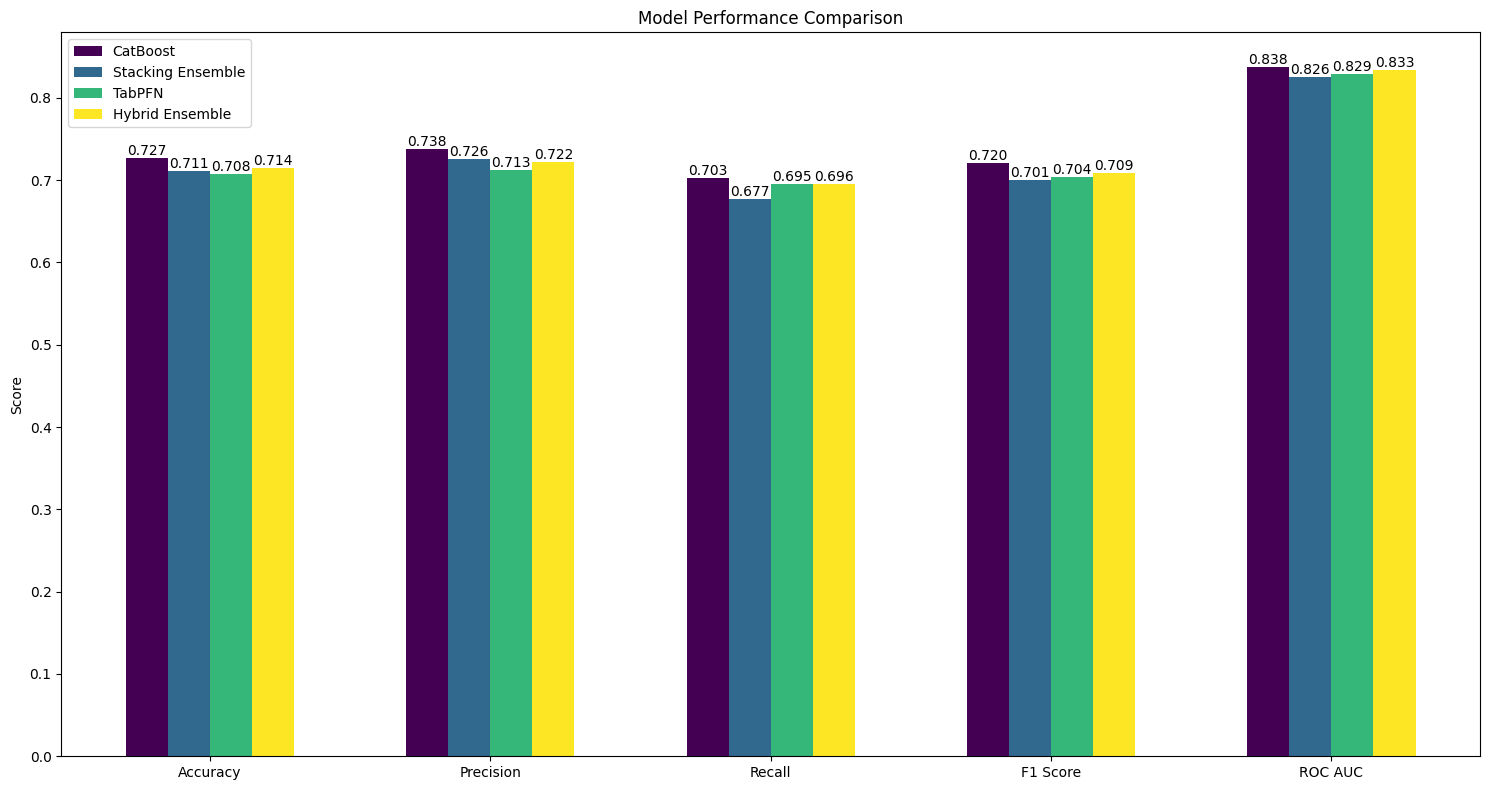

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the models as the index for easier plotting
metrics_df_indexed = metrics_df.set_index('Model')

# Get the list of metrics (excluding 'Model')
metric_names = metrics_df_indexed.columns

# Set the positions for the bars on the x-axis
x = np.arange(len(metric_names))

# Set the width of the bars
bar_width = 0.15

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# Define a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics_df_indexed.index)))

for i, model in enumerate(metrics_df_indexed.index):
    ax.bar(x + i * bar_width, metrics_df_indexed.loc[model], bar_width, label=model, color=colors[i])

# Add labels, title, and ticks
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + bar_width * (len(metrics_df_indexed.index) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend()

# Add the values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

fig.tight_layout()
plt.show()

In [ ]:
# Display only the metrics for the Hybrid Ensemble model
display(metrics_df[metrics_df['Model'] == 'Hybrid Ensemble'])

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Hybrid Ensemble,0.714238,0.722261,0.695883,0.708827,0.833435


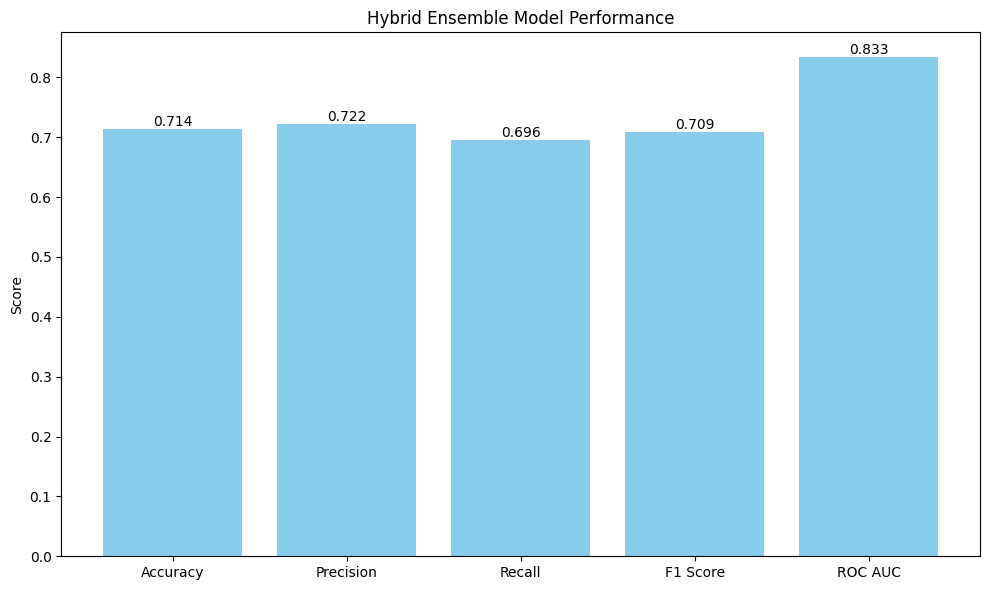

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to only include the Hybrid Ensemble model
hybrid_metrics = metrics_df[metrics_df['Model'] == 'Hybrid Ensemble'].set_index('Model')

# Get the list of metrics
metric_names = hybrid_metrics.columns

# Set the positions for the bars on the x-axis
x = np.arange(len(metric_names))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for the Hybrid Ensemble
ax.bar(x, hybrid_metrics.iloc[0].values, color='skyblue')

# Add labels, title, and ticks
ax.set_ylabel('Score')
ax.set_title('Hybrid Ensemble Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)

# Add the values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

fig.tight_layout()
plt.show()

In [ ]:
import joblib

# Define the path to save the model
model_path = '/content/drive/My Drive/stroke_prediction_hybrid_model.pkl'

# Save the hybrid model
joblib.dump(hybrid_model, model_path)

print(f"Hybrid model saved successfully at: {model_path}")

Hybrid model saved successfully at: /content/drive/My Drive/stroke_prediction_hybrid_model.pkl


In [ ]:
import joblib
import pandas as pd

# Define the path to the saved model
model_path = '/content/drive/My Drive/stroke_prediction_hybrid_model.pkl'

# Load the hybrid model
loaded_model = joblib.load(model_path)

print("Hybrid model loaded successfully.")

# --- Make predictions on new data ---
# For demonstration, let's use a few samples from the original test set
# In a real scenario, you would load and preprocess your new data
sample_new_data = X_test[:5] # Using first 5 samples from test set as example

# Predict the class labels
predictions = loaded_model.predict(sample_new_data)

# Predict the probabilities
probabilities = loaded_model.predict_proba(sample_new_data)[:, 1]

print("\nSample New Data (first 5 rows of X_test):")
print(pd.DataFrame(sample_new_data, columns=X.columns).head()) # Display with original column names

print("\nPredictions for Sample New Data:")
print(predictions)

print("\nProbabilities of Stroke (class 1) for Sample New Data:")
print(probabilities)

Hybrid model loaded successfully.

Sample New Data (first 5 rows of X_test):
   Hypertension  Heart Disease  Average Glucose Level  Body Mass Index (BMI)  \
0      1.737694       0.994377              -1.152369               1.701395   
1     -0.576454      -1.006964               0.038673               0.928086   
2     -0.576454       0.994377              -1.524430              -1.343424   
3      1.737694      -1.006964               0.236068              -1.712787   
4     -0.576454      -1.006964              -0.326224              -1.348958   

   Stroke History  Stress Levels  Symptoms  Age_scaled  Age_group  \
0        1.000444       0.912033 -0.797110    0.853189  -1.192045   
1       -1.000889       1.434425 -1.250144   -0.239369   0.177441   
2       -1.000889       1.368255  0.098838   -1.474435   0.606621   
3        1.000444      -1.330772 -0.182933    1.708235   0.070204   
4        1.000444       1.396116 -0.182933   -0.001857   1.384902   

   Gender_encoded  ...  Phy

I will create a sample patient data point and use the loaded model to predict their stroke risk. This involves applying the same preprocessing steps (imputation, feature engineering, encoding, and scaling) as were used during training.

# Task
Combine the feature importances from the CatBoost and Random Forest models, and then use this combined feature set to train and evaluate a TabPFN model.

## Combine feature importances

### Subtask:
Create a new dataset containing the feature importance scores from both CatBoost and Random Forest models for each feature.


**Reasoning**:
Combine the feature importance dataframes from CatBoost and Random Forest into a single dataframe and display it.



In [ ]:
combined_feature_importance = pd.DataFrame({
    'Feature Name': feature_importance['Feature Name'],
    'CatBoost Importance': feature_importance['Importances']
})

# Merge with Random Forest importance
combined_feature_importance = combined_feature_importance.merge(
    rf_feature_importance[['Feature Name', 'Importances']],
    on='Feature Name',
    suffixes=('_CatBoost', '_RandomForest')
)

combined_feature_importance.rename(
    columns={'Importances_RandomForest': 'Random Forest Importance'}, inplace=True
)

display(combined_feature_importance)

,Feature Name,CatBoost Importance,Importances
0,Symptoms,36.176802,0.251959
1,Cholesterol Levels,31.979275,0.271283
2,Blood Pressure Levels,17.221422,0.173233
3,Body Mass Index (BMI),1.278201,0.033247
4,Stress Levels,1.206469,0.031839
5,Average Glucose Level,1.201139,0.033176
6,Stress_x_Age,0.891435,0.031986
7,Dietary Habits,0.889275,0.016133
8,Glucose_x_Age,0.874381,0.032072
9,Work Type,0.850455,0.011277
